In [1]:
import numpy as np

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the data from CSV
df = pd.read_csv('data.csv')

df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,01-01-2024,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,02-01-2024,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,03-01-2024,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,04-01-2024,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,05-01-2024,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,23-08-2024,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,24-08-2024,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,25-08-2024,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,26-08-2024,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [7]:
print(df.describe())

print(df.describe(include=['object']))

       Transaction ID                 Date  Units Sold   Unit Price  \
count       240.00000                  240  240.000000   240.000000   
mean      10120.50000  2024-04-29 12:00:00    2.158333   236.395583   
min       10001.00000  2024-01-01 00:00:00    1.000000     6.500000   
25%       10060.75000  2024-02-29 18:00:00    1.000000    29.500000   
50%       10120.50000  2024-04-29 12:00:00    2.000000    89.990000   
75%       10180.25000  2024-06-28 06:00:00    3.000000   249.990000   
max       10240.00000  2024-08-27 00:00:00   10.000000  3899.990000   
std          69.42622                  NaN    1.322454   429.446695   

       Total Revenue  
count     240.000000  
mean      335.699375  
min         6.500000  
25%        62.965000  
50%       179.970000  
75%       399.225000  
max      3899.990000  
std       485.804469  
       Product Category                 Product Name         Region  \
count               240                          240            240   
unique     

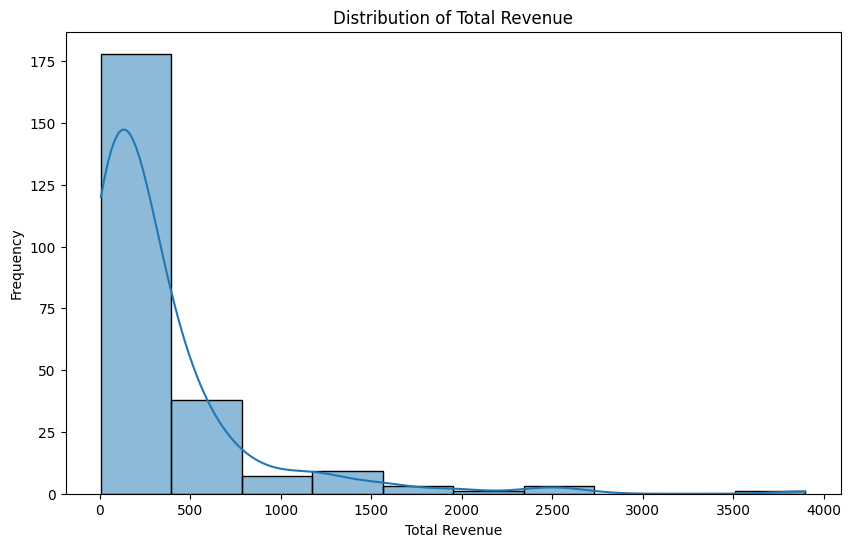

In [8]:
#Distribution of Total Revenue

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Revenue'], kde=True, bins=10)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()


<ipython-input-9-c09a0536a318>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product Category', palette='viridis')


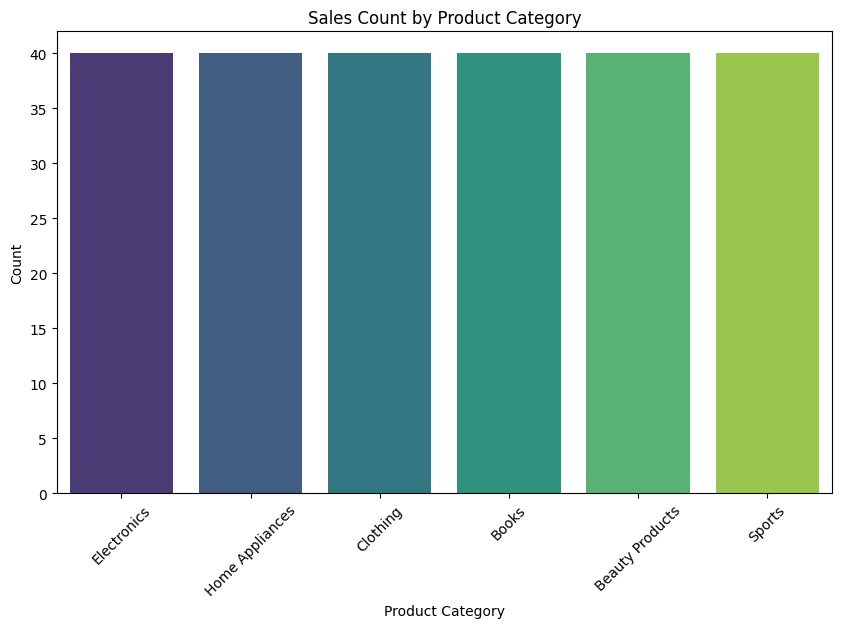

In [9]:
#Sales by Product Category

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product Category', palette='viridis')
plt.title('Sales Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


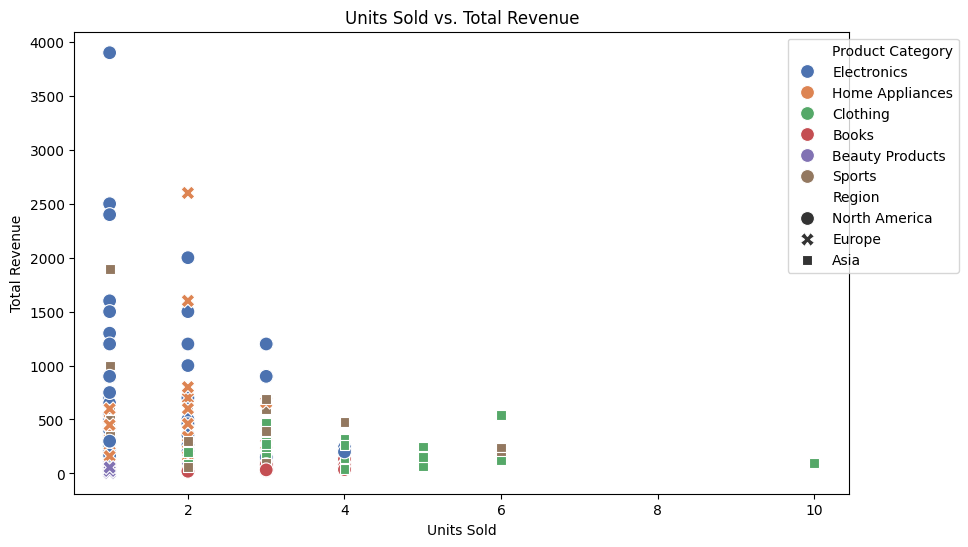

In [10]:
#Units Sold vs. Total Revenue

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Units Sold', y='Total Revenue', hue='Product Category', style='Region', palette='deep', s=100)
plt.title('Units Sold vs. Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


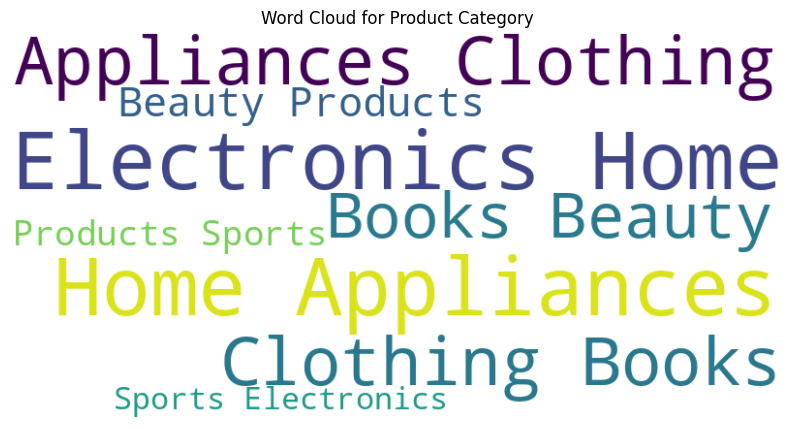

In [11]:
from wordcloud import WordCloud

text = " ".join(category for category in df['Product Category'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Category')
plt.show()

<ipython-input-12-aa8f6e7e4f05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Total Revenue', palette='viridis')


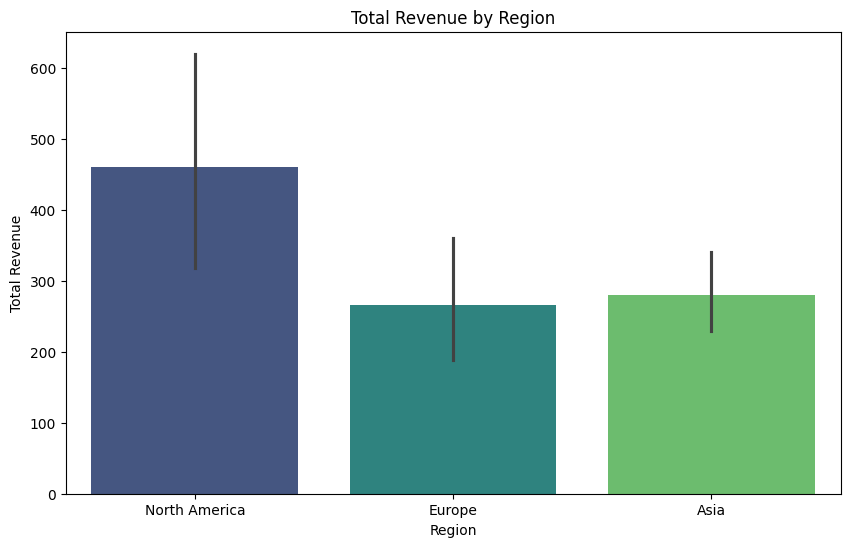

In [12]:
# Total Revenue by Region

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Total Revenue', palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()